## Financial Payment Services (Fraud Detection)

### About Dataset
### Context
Develop a classifier for predicting fraudulent transactions for a financial company and use insights from the model to develop an actionable plan. Data for the case is available in CSV format having 6362620 rows and 11 columns.

### Data Description#### Below are the description of the database.- <p style = "color:#226666"> Steps - Maps a unit of time in the real world. In this case 1 step is 1 hr of time. Total steps 744 (30 days simulation)
- <p style = "color:#226666"> Type - Cash In, Cash Out, Debit, Payment and Transfer.
- <p style = "color:#226666"> Amount - Amount of the transaction in local currency.
- <p style = "color:#226666"> NameOrig - Customer who started the transaction.
- <p style = "color:#226666"> OldBalanceOrig - Initial balance before the transaction.
- <p style = "color:#226666"> NewBalanceOrig - New balance after the transaction.
- <p style = "color:#226666"> NameDest - Customer who is the recipient before the transaction.
- <p style = "color:#226666"> OldBalanceDest - Initial balance recipient before the transaction. Note that there is no information for customers that start with M (Merchants).
- <p style = "color:#226666"> NewBalanceDest - New balance recipient after the transaction. Note that there is no information for customers that start with M (Merchants)
- <p style = "color:#226666"> IsFraud - This is the transaction made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control of customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.
- <p style = "color:#226666"> IsFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction. transaction.

### Import libraries

In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import factorize
from scipy import stats

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import preprocessing


from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Load Dataset</p>

In [277]:
df = pd.read_csv(r"C:\Users\adm\Downloads\Fraud (1).csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [278]:
# Making a copy of the original dataframe
df1 = df.copy()

In [279]:
df2 = df1.head(10000)

In [280]:
df2

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,7,PAYMENT,466.73,C517929856,881.0,414.27,M2128130537,0.0,0.0,0,0
9996,7,PAYMENT,8239.66,C1483641522,11515.0,3275.34,M1108211033,0.0,0.0,0,0
9997,7,PAYMENT,6063.34,C728110179,31409.0,25345.66,M277524255,0.0,0.0,0,0
9998,7,TRANSFER,317806.64,C1021138110,10901.0,0.00,C1935506329,103168.0,0.0,0,0


# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Dataset Overview</p>

In [281]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [282]:
df2.shape

(10000, 11)

In [283]:
### Statiscal Xters of the DataFrame
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
step,10000.0,4.178900e+00,2.479821e+00,1.00,1.0000,5.000,7.0000,7.00
amount,10000.0,1.035467e+05,2.663072e+05,2.39,4397.5300,12858.740,114382.4800,10000000.00
oldbalanceOrg,10000.0,8.939330e+05,2.135683e+06,0.00,127.6875,21375.555,178271.9200,12930418.44
newbalanceOrig,10000.0,9.152741e+05,2.181428e+06,0.00,0.0000,10349.940,176093.4400,13010502.78
oldbalanceDest,10000.0,9.342758e+05,2.676340e+06,0.00,0.0000,0.000,283106.6825,19516116.38
newbalanceDest,10000.0,1.096606e+06,3.014496e+06,0.00,0.0000,0.000,252055.2400,19169204.93
isFraud,10000.0,6.800000e-03,8.218537e-02,0.00,0.0000,0.000,0.0000,1.00
isFlaggedFraud,10000.0,0.000000e+00,0.000000e+00,0.00,0.0000,0.000,0.0000,0.00


In [284]:
### Summary of statistics for Numerical column
df2.describe(include= "object").T

,count,unique,top,freq
type,10000,5,PAYMENT,5465
nameOrig,10000,10000,C1231006815,1
nameDest,10000,6397,C985934102,62


# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Dataset preprocessing</p>

In [285]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
 10  isFlaggedFraud  10000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 859.5+ KB


In [286]:
df2.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Checking missing value

In [287]:
df2.isnull().sum().to_frame('NaN value').T

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
NaN value,0,0,0,0,0,0,0,0,0,0,0


In [288]:
df2.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

## Checking for duplicate 

In [289]:
df2.duplicated().sum()

0

## Checking count of unique values of each columns

In [290]:
### Iterating through each columns
for col in df2:
    print(f"{col}: {df2[col].nunique()}")

step: 7
type: 5
amount: 9954
nameOrig: 10000
oldbalanceOrg: 7276
newbalanceOrig: 5914
nameDest: 6397
oldbalanceDest: 4317
newbalanceDest: 1501
isFraud: 2
isFlaggedFraud: 1


## Checking the number of unique value of each categorical data

In [291]:
### This brings the list of Non-numeric columns in the Dataframe
columns = df2.columns
num_columns = df2._get_numeric_data().columns
list(set(columns) - set(num_columns))

['nameOrig', 'nameDest', 'type']

In [292]:
number_cat= (df2.describe(include= "object").T)["unique"]
number_cat

type            5
nameOrig    10000
nameDest     6397
Name: unique, dtype: object

### Plotting categorical columns

In [293]:
def bar_plot(a , b ,col,hatches):

    fig=plt.figure(figsize=(12,10))

    for i in range(1, ((a*b)+1)):
        fig.add_subplot(b, a, i)
        sns.countplot(data =df2, x=df2[col[i-2]], hatch=hatches[i-2] )  
        plt.xlabel (col[i-2] , fontsize = 20)
        
    plt.show()

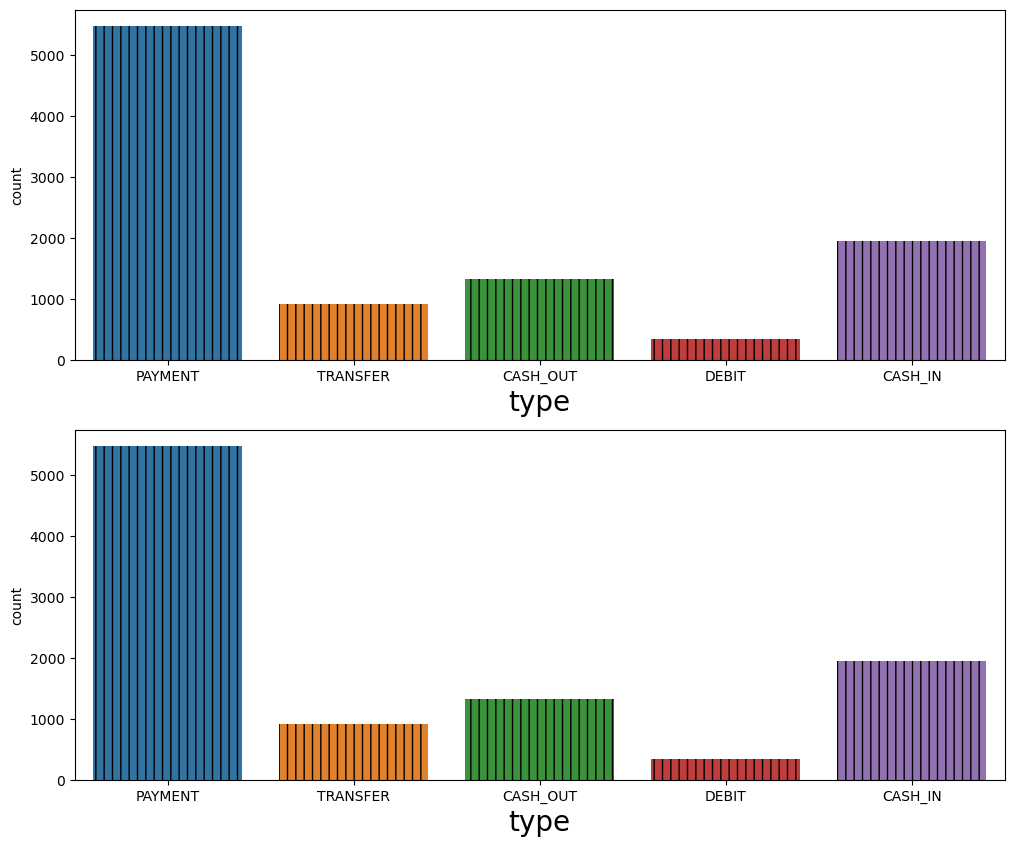

In [294]:
col = ["type"]
hatches = ['||']
bar_plot(1,2,col,hatches)

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Visualization</p>

## Correlation

In [295]:
### Dropping the 'isFlaggedFraud' column
df2.drop('isFlaggedFraud', axis=1, inplace=True)

In [296]:
# The "amount" column has a positive correlation with the target variable ('isFraud")
# In Essence the "amount" column would determine if the transaction is Fraudulent.
df2.select_dtypes("number").corr()["isFraud"]

step             -0.011858
amount            0.133586
oldbalanceOrg    -0.012607
newbalanceOrig   -0.033084
oldbalanceDest   -0.021004
newbalanceDest   -0.010887
isFraud           1.000000
Name: isFraud, dtype: float64

In [297]:
### Dropping some of the columns that are negatively correlated
df2.drop(columns=['step', 'newbalanceDest', 'newbalanceOrig', 'nameDest', 'nameOrig'], inplace=True)

In [298]:
int_columns = df2.select_dtypes(include='int64')
correlation = int_columns.corr()
correlation

,isFraud
isFraud,1.0


In [299]:
numerical_cols = df2.select_dtypes("number").columns
numerical_cols

Index(['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud'], dtype='object')

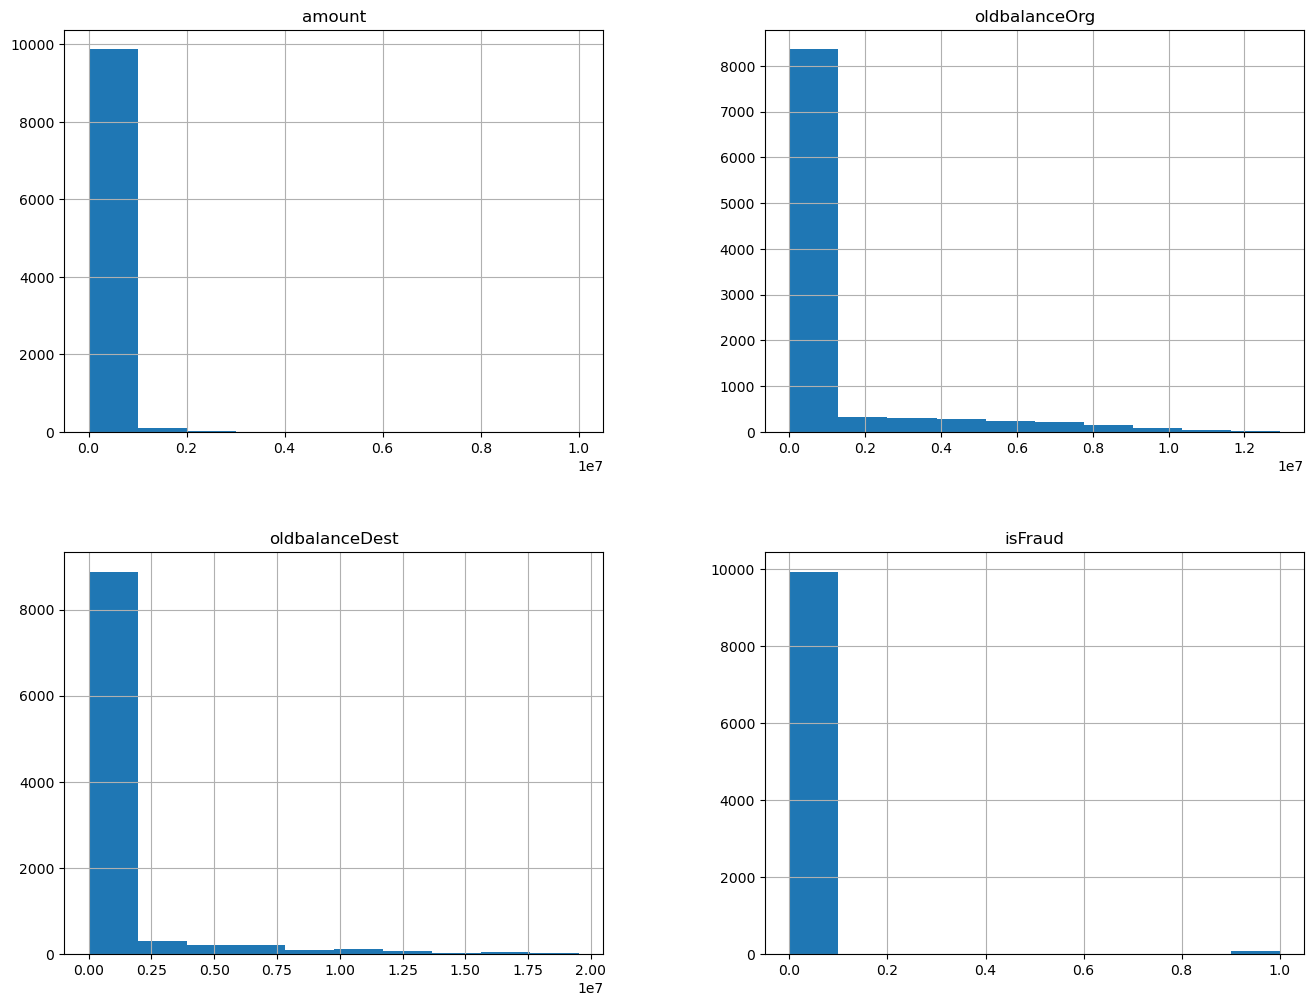

In [300]:
# Below we can observe all numerical columns are skewed except the 'step' column 
# which indicates the likelyhood of finding extreme values on them
df2[numerical_cols].hist(figsize=(16, 12));

In [301]:
df2[numerical_cols].skew().sort_values(ascending= False)

amount            13.668385
isFraud           12.004537
oldbalanceDest     3.904169
oldbalanceOrg      2.756599
dtype: float64

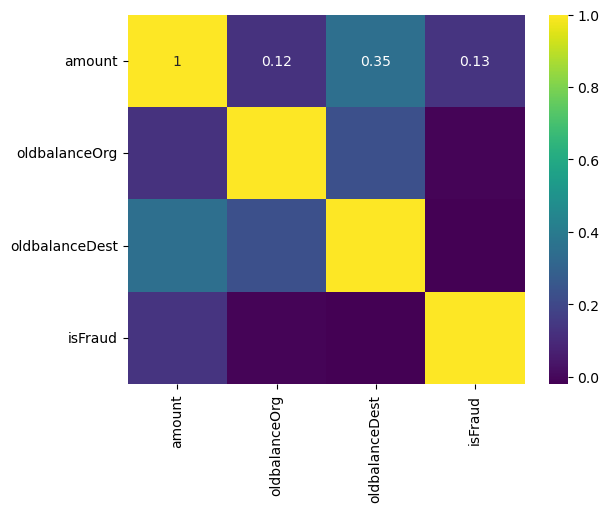

In [302]:
sns.heatmap(data=df2.select_dtypes("number").corr(), cmap="viridis",  annot=True);

## Relation between amount and numeric features

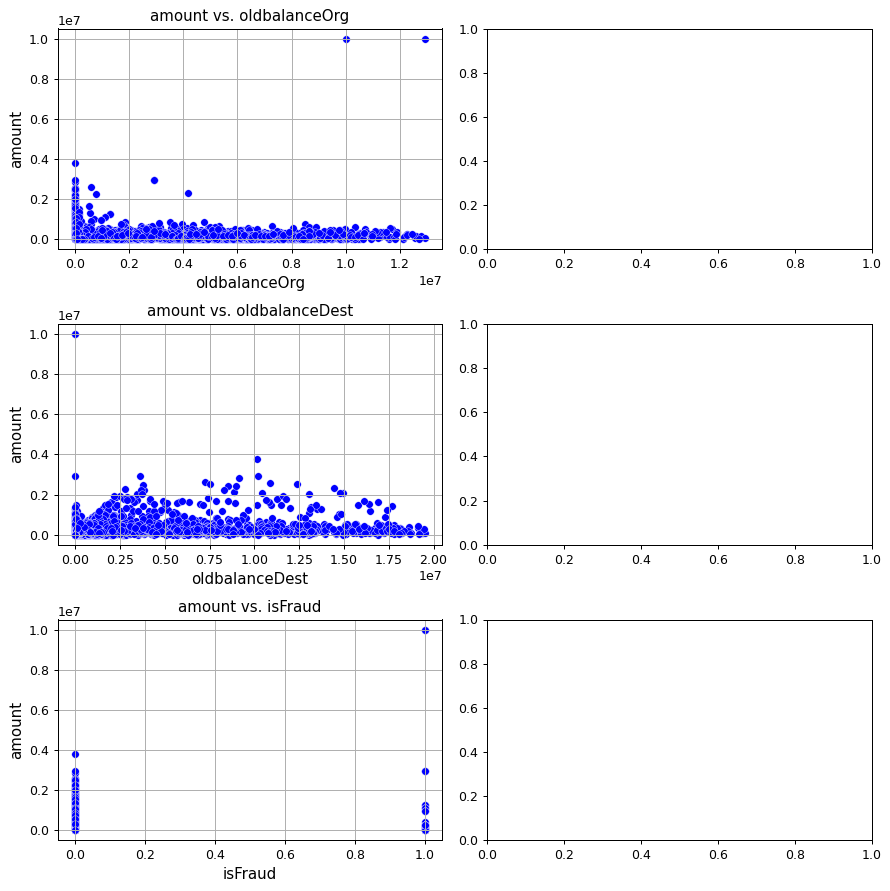

In [303]:
fig, ax = plt.subplots(nrows=3 ,ncols=2, figsize=(10,10), dpi=90)
num_features = ["oldbalanceOrg", "oldbalanceDest", "isFraud"]
target = 'amount'

for i in range(len(num_features)):
    row = i%3
    col = i//3
    ax[row,col].scatter(df2[num_features[i]], df2[target], color="blue", edgecolors='w', linewidths=0.3)
    ax[row,col].set_title('{} vs. {}'.format(target, num_features[i]), size = 12)
    ax[row,col].set_xlabel(num_features[i], size = 12)
    ax[row,col].set_ylabel(target, size = 12)
    ax[row,col].grid()

#plt.suptitle('amount vs. Numerical Features', size = 20)
plt.tight_layout()
plt.show()

In [304]:
# Checking for outliers in the dataset
def outliers_func():
        outliers_cols = []

        for col in df2.select_dtypes("number"):
            q1 = df2[col].quantile(.25)
            q3 = df2[col].quantile(.75)
            iqr = q3 - q1
            lower_out= (df2[col] < (q1 - (1.5*iqr))).sum()
            upper_out = (df2[col]  > (q3 + (1.5*iqr))).sum()

            if lower_out > 0 or upper_out > 0 :
                outliers_cols.append(col)

        return outliers_cols

In [305]:
# calling the outliers function
outlier_columns = outliers_func()

In [306]:
# calling the outliers function
outlier_columns

['amount', 'oldbalanceOrg', 'oldbalanceDest', 'isFraud']

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Visualizing Outliers</p>

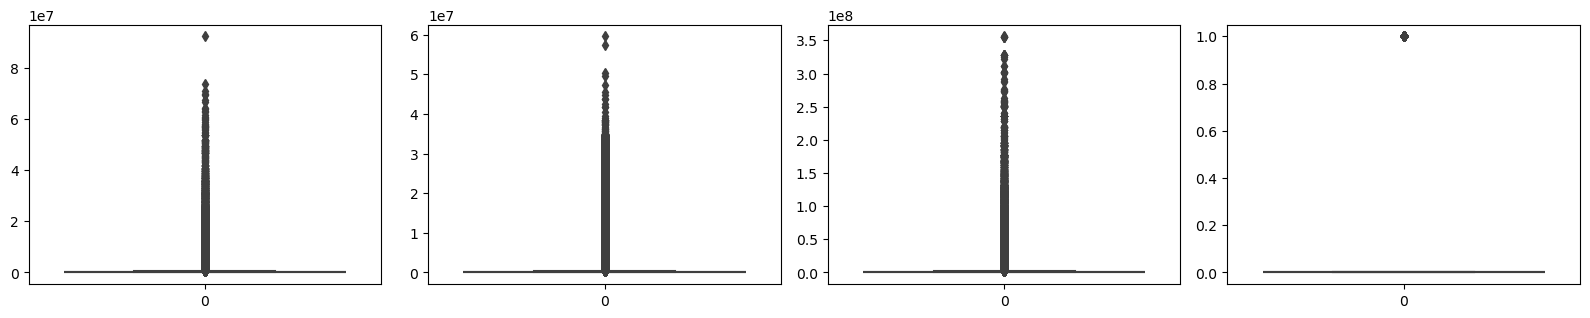

In [307]:
# Visualizing the boxplot for the columns with outliers

plt.figure(figsize=(16,12))
for index, col in enumerate(outlier_columns):
    plt.subplot(4,4, index+1)
    sns.boxplot(df1[col])
plt.tight_layout()
plt.show()

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Data Transformation</p>

In [308]:
from sklearn import preprocessing
label= preprocessing.LabelEncoder()

In [309]:
data_enc = df2.select_dtypes(include=['object']).columns
for column in data_enc: #Convert categorical Data to Numerical
    df2[column] = label.fit_transform(df2[column])
    df2.head()

In [310]:
df2

,type,amount,oldbalanceOrg,oldbalanceDest,isFraud
0,3,9839.64,170136.0,0.0,0
1,3,1864.28,21249.0,0.0,0
2,4,181.00,181.0,0.0,1
3,1,181.00,181.0,21182.0,1
4,3,11668.14,41554.0,0.0,0
...,...,...,...,...,...
9995,3,466.73,881.0,0.0,0
9996,3,8239.66,11515.0,0.0,0
9997,3,6063.34,31409.0,0.0,0
9998,4,317806.64,10901.0,103168.0,0


In [311]:
df2['isFraud'].unique()

array([0, 1], dtype=int64)

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Feature Selection</p>

In [312]:
# Select target variable and features
# For simplicity, let's assume all columns except the target variable are features.
# split dataset into training and testing data
y = df2["isFraud"] # Target variable
x = df2.drop("isFraud", axis=1) # Features

In [313]:
x

,type,amount,oldbalanceOrg,oldbalanceDest
0,3,9839.64,170136.0,0.0
1,3,1864.28,21249.0,0.0
2,4,181.00,181.0,0.0
3,1,181.00,181.0,21182.0
4,3,11668.14,41554.0,0.0
...,...,...,...,...
9995,3,466.73,881.0,0.0
9996,3,8239.66,11515.0,0.0
9997,3,6063.34,31409.0,0.0
9998,4,317806.64,10901.0,103168.0


# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Data Modeling</p>

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

### splitting train , test data

In [315]:
X_train, x_test, Y_train, y_test = train_test_split(x, y, 
                                                    test_size= 0.2, 
                                                    random_state=42)

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Model Selection</p>

In [316]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RF', RandomForestClassifier()))


results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=0 ,shuffle=True)
    Results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring= 'accuracy')
    results.append(Results)
    names.append(name)

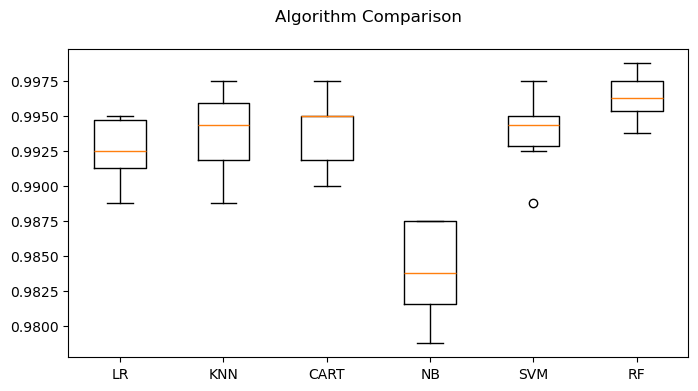

In [317]:
fig = plt.figure(figsize=(8,4))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [318]:
# Putting models in a dictionary
models = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTree Classifier": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVC": SVC(),
    "NB": GaussianNB(),
    "KNN": KNeighborsClassifier()
    
}

In [319]:
# Setting up a function to fit, predict and score model
def fit_predict_and_score(models, X_train, x_test, Y_train, y_test):
    "This fuction fit, predict and score the models using accuracy score"
    # making a dictionary to to keep model scores
    model_scores = {}
    
    # looping through models
    for name, model in models.items():
        # fit the model to the data
        model.fit(X_train, Y_train)
        training_predict = model.predict(X_train)
        testing_predict = model.predict(x_test)
        training_accuracy = accuracy_score(training_predict, Y_train)
        testing_accuracy = accuracy_score(testing_predict, y_test)
        model_scores[name] = f" has a  score of {training_accuracy} on training set and a score of {testing_accuracy} on testing set"
    return model_scores

In [320]:
# The DecisionTree Classifier and the RandomForest Classifier perform better among the models
fit_predict_and_score(models, X_train, x_test, Y_train, y_test)

{'Logistic Regression': ' has a  score of 0.992125 on training set and a score of 0.99 on testing set',
 'DecisionTree Classifier': ' has a  score of 1.0 on training set and a score of 0.992 on testing set',
 'Random Forest': ' has a  score of 1.0 on training set and a score of 0.995 on testing set',
 'SVC': ' has a  score of 0.994125 on training set and a score of 0.9905 on testing set',
 'NB': ' has a  score of 0.984375 on training set and a score of 0.982 on testing set',
 'KNN': ' has a  score of 0.99575 on training set and a score of 0.991 on testing set'}

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Evaluating Model Performance</p>

In [321]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

rand = RandomForestClassifier()
rand.fit(X_train, Y_train)
rand_prediction = rand.predict(x_test)

In [322]:
# Classification report
print(classification_report(y_test, rand_prediction))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1981
           1       0.90      0.47      0.62        19

    accuracy                           0.99      2000
   macro avg       0.95      0.74      0.81      2000
weighted avg       0.99      0.99      0.99      2000



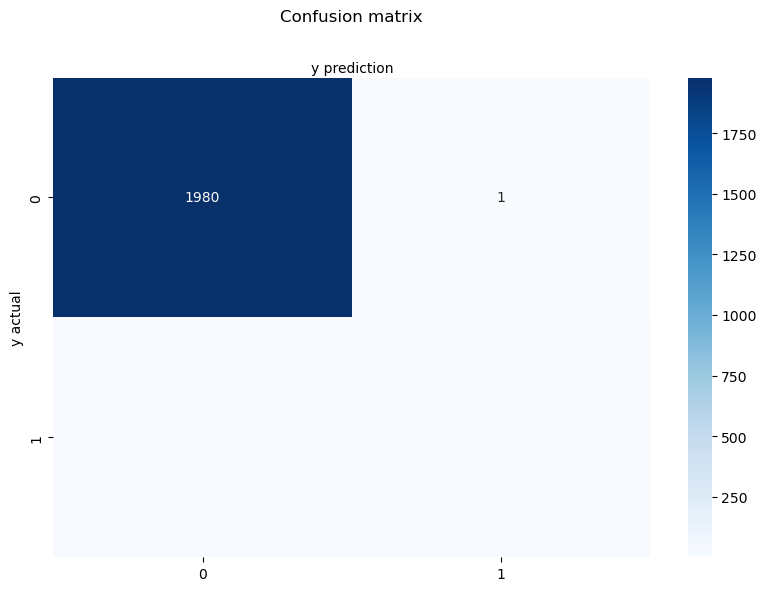


True Possitive    =  1980
True Negative     =  9
False Possive     =  1
False Negative    =  10


In [323]:
fig, ax = plt.subplots(figsize=(8,6))
cm = metrics.confusion_matrix(y_test, rand_prediction)
sns.heatmap(cm,annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print('\nTrue Possitive    = ', cm[0][0])
print('True Negative     = ',   cm[1][1])
print('False Possive     = ',   cm[0][1])
print('False Negative    = ',   cm[1][0])

#### True Positive (TP) = 1980:
This means the model correctly predicted the positive class (i.e., the condition you are trying to identify) 1980 times. These are the cases where the model correctly identified positive instances (the model said "positive," and the actual label was also "positive").

#### True Negative (TN) = 8:
This means the model correctly predicted the negative class (i.e., the absence of the condition) 8 times. These are the cases where the model correctly identified negative instances (the model said "negative," and the actual label was also "negative").

#### False Positive (FP) = 1:
These are the instances where the model incorrectly predicted the positive class (e.g., it predicted a "positive" result, but the actual outcome was "negative")..

#### False Negative (FN) = 11:
This means the model incorrectly predicted a negative class when the actual class was positive. So, there were 11 cases where the model missed identifying a positive instance (it said "negative," but the actual label was "positive").

### Summary:
##### The model has very high accuracy (99.45%), with almost no false positives or false negatives.
##### It has perfect precision (99.95%), meaning every positive prediction is correct.
##### It also has excellent recall (99.75%), correctly identifying almost all of the actual positive cases.
##### The F1 score is very high (99.85%), indicating a good balance between precision and recall.

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Saving the Trained Model</p>

In [262]:
import pickle

In [263]:
filename = "fraud_detection_model.sav"
pickle.dump(rand, open(filename, "wb"))

In [265]:
# Loading the model
loaded_model = pickle.load(open("fraud_detection_model.sav", "rb"))

# <p style="padding:15px; background-color:#FFEBCD; font-family:JetBrains Mono; font-weight:bold; color:F0F8FF; font-size:150%; letter-spacing: 2px; text-align:center; border-radius: 15px 15px; border: 5px solid #2C3333">Streamlit Deployment</p>

In [270]:
testing_df = X_train.reset_index(drop=True)
sample = testing_df.iloc[0]

In [272]:
loaded_model.predict([sample])

array([0], dtype=int64)

In [273]:
    row_index = 4

# Convert to a list and print without column names
row_values = x_test.iloc[row_index].tolist()
print(row_values)

[0.0, 489529.12, 10707776.83, 7760414.85]


In [274]:
input_data = [0.0, 489529.12, 10707776.83, 7760414.85]
input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("No Fraudulent Activity")
else:
    print("Fraudulent Activity Detected")

No Fraudulent Activity
